In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

def pde_ar(t, z, N):
    x = z[:N]
    y = z[N:2*N]
    vx = z[2*N:3*N]
    vy = z[3*N:]
    dx = np.zeros(N)
    dy = np.zeros(N)
    dvx = np.zeros(N)
    dvy = np.zeros(N)
    for j in range(N):
        sx = sy =0
        for i in range(N):
            if i != j:
                dx_ij = x[j] - x[i]
                dy_ij = y[j] - y[i]
                r = (dx_ij**2 + dy_ij**2)**0.5
                c = ca*sp.exp(-r/la)/(la*r) - cb*sp.exp(-r/lb)/(lb*r)
                sx += c*dx_ij
                sy += c*dy_ij
        
        n = vx[j]**2 + vy[j]**2
              
        dvx[j] = (-sx + (alpha-beta*n)*vx[j]) / m
        dvy[j] = (-sy + (alpha-beta*n)*vy[j]) / m
        dx[j] = vx[j]
        dy[j] = vy[j]
        
    dzdt = np.concatenate([dx, dy, dvx, dvy])
    return dzdt


def simulate(N, T, dt, x0, y0, vx0, vy0):
    z0 = np.concatenate([x0, y0, vx0, vy0])
    t_span = (0, T)
    sol = solve_ivp(lambda t, z: pde_ar(t, z, N), t_span, z0, max_step=dt)
    return sol

def plot_solution(sol, N):
    t = sol.t
    z = sol.y
    x = z[:N]
    y = z[N:2*N]
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(N):
        plt.scatter(x[i], y[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    

    plt.show()


In [13]:
def plot_solution_fini(sol, N):
    t = sol.t
    z = sol.y
    x = z[:N]
    y = z[N:2*N]
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(N):
        plt.scatter(x[i][-10:], y[i][-10:])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    

    plt.show()

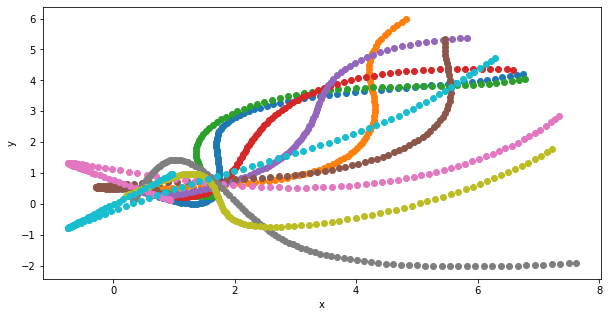

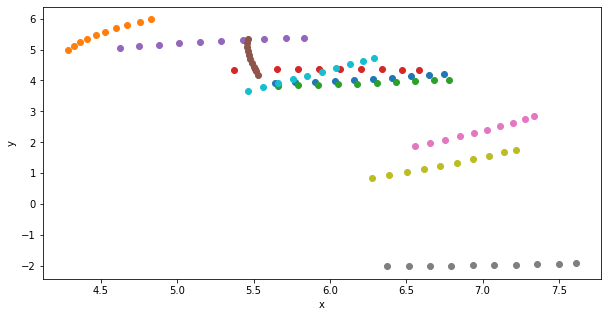

In [18]:
N = 10
T = 10
dt = 0.1



x0 = np.random.uniform(size=N)
y0 = np.random.uniform(size=N)
vx0 = np.zeros(N)
vy0 = np.zeros(N)
alpha = 1
beta = 0.5
m = 1
a = 2
b = 1
ca = 1
cb = 0.6
la = 1
lb = 1

sol = simulate(N, T, dt, x0, y0, vx0, vy0)


plot_solution(sol, N)
plot_solution_fini(sol,N)